In [14]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.SeqUtils import GC
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import statistics
from IPython.display import Image
import seaborn as sns


round_paraneter = 3  


record = SeqIO.read("/home/pavel/Desktop/8_семестр/GEL/6666666.540225.gbk", "genbank")

gd_diagram = GenomeDiagram.Diagram(record.id)
name = record.name
seq = record.seq
print(name)

strain


In [15]:
def save_obj(obj, name):   # we have to store big dictionaries that take a lot of machine time
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):  # and load them
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [16]:
window = 50
round_paraneter = 3

GC_dict = {}
if window%2 == 0:
    for i in range(len(seq)):
        if i%5 == 0:
            start = int(i- window/2)
            end = int(i + window/2)
            if start < 0:
                sub_seq = str(seq[-start:]) + str(seq[:end])
                GC_dict[i] = round(GC(sub_seq), round_paraneter)
            if start >=  0 and end <= len(seq):
                sub_seq = seq[start:end]
                GC_dict[i] = round(GC(sub_seq), round_paraneter)
            if end > len(seq):
                sub_seq = seq[start:] + seq[:len(seq) - end]
                GC_dict[i] = round(GC(sub_seq), round_paraneter)

print("Done")

Done


In [17]:
save_obj(GC_dict, name)  # you can just back up your dictionary

In [18]:
GC_dict = load_obj(name)  # or refresh it

In [19]:
x = list(GC_dict.keys())
y = list(GC_dict.values())

m = round(np.mean(y), round_paraneter)
s = round(statistics.stdev(y), round_paraneter)

l_up = round((m + s), round_paraneter)
l_down = round((m - s), round_paraneter)
print(len(x), m, s, l_up, l_down)

4200 32.878 8.616 41.494 24.262


In [20]:
gd_track_for_features = gd_diagram.new_track(1, name="Annotated Features")
gd_feature_set = gd_track_for_features.new_set()

for feature in record.features:
    #if feature.type != "gene":
        #Exclude this feature
        #continue
    #print(feature.qualifiers)
    gene_seq = str(feature.extract(seq))
    gene_GC = round(GC(gene_seq), round_paraneter)
    #print(l_down, gene_GC, l_up)
    if gene_GC < l_down:
        #print(feature.qualifiers['gene'], "down")
        color = colors.blue
        gd_feature_set.add_feature(feature, sigil="ARROW", arrowshaft_height=0.2,
                               color=color, label=True,
                               label_size = 25, label_angle=0)
    if gene_GC > l_up:
        #print(feature.qualifiers['gene'], "up")
        color = colors.red
        gd_feature_set.add_feature(feature, sigil="ARROW", arrowshaft_height=0.2,
                               color=color, label=True,
                               label_size = 25, label_angle=0)
    if gene_GC < l_up and gene_GC > l_down:
        color = colors.gray
        gd_feature_set.add_feature(feature, sigil="ARROW", arrowshaft_height=0.2,
                               color=color, label=True,
                               label_size = 25, label_angle=0)


In [21]:
#gd_diagram.draw(format="linear", fragments=40,start=0, end=len(record))
#gd_diagram.write("plasmid_linear_nice.png", "PNG")

In [22]:
#Image(filename='plasmid_linear_nice.png') 

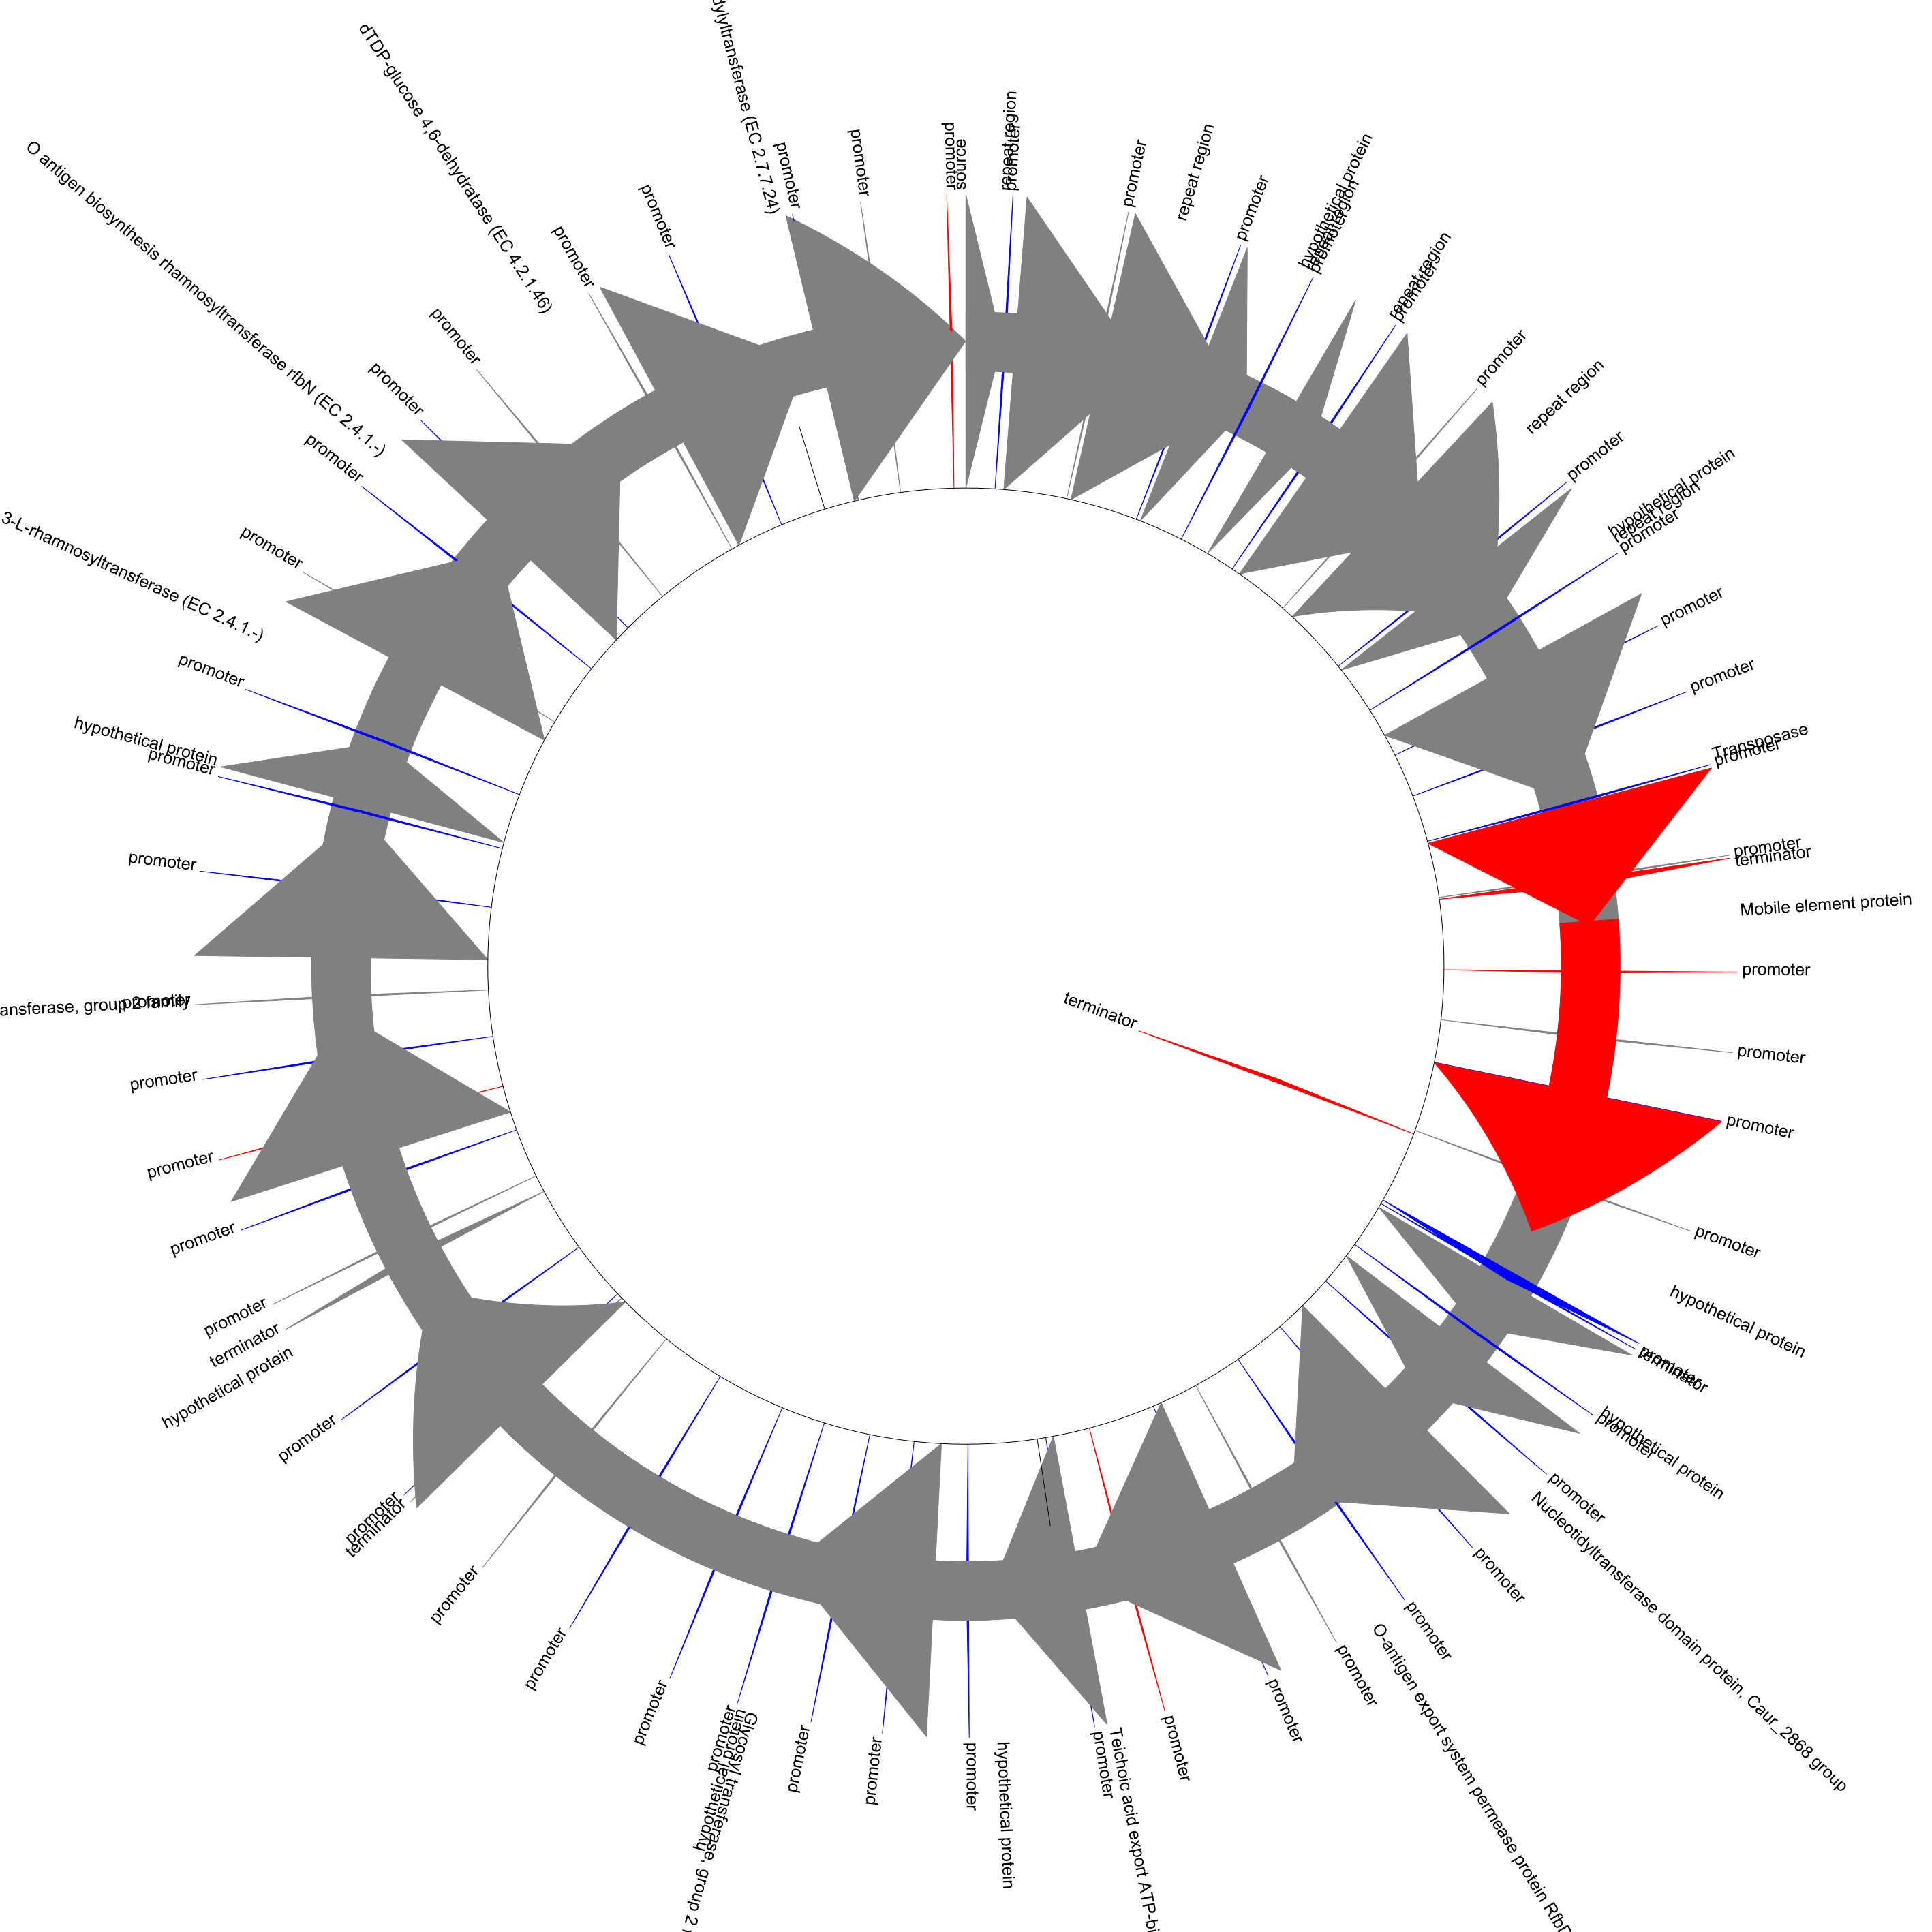

In [25]:
gd_diagram.draw(format="circular", circular=True, pagesize=(100*cm,100*cm), start=0, end=len(record), circle_core = 0.1)
gd_diagram.write("/home/pavel/Desktop/8_семестр/GEL/Annotation_sup/GC_fold_change.png", "PNG")
gd_diagram.write("/home/pavel/Desktop/8_семестр/GEL/Annotation_sup/GC_fold_change.pdf", "PDF")
Image(filename="/home/pavel/Desktop/8_семестр/GEL/Annotation_sup/GC_fold_change.png") 

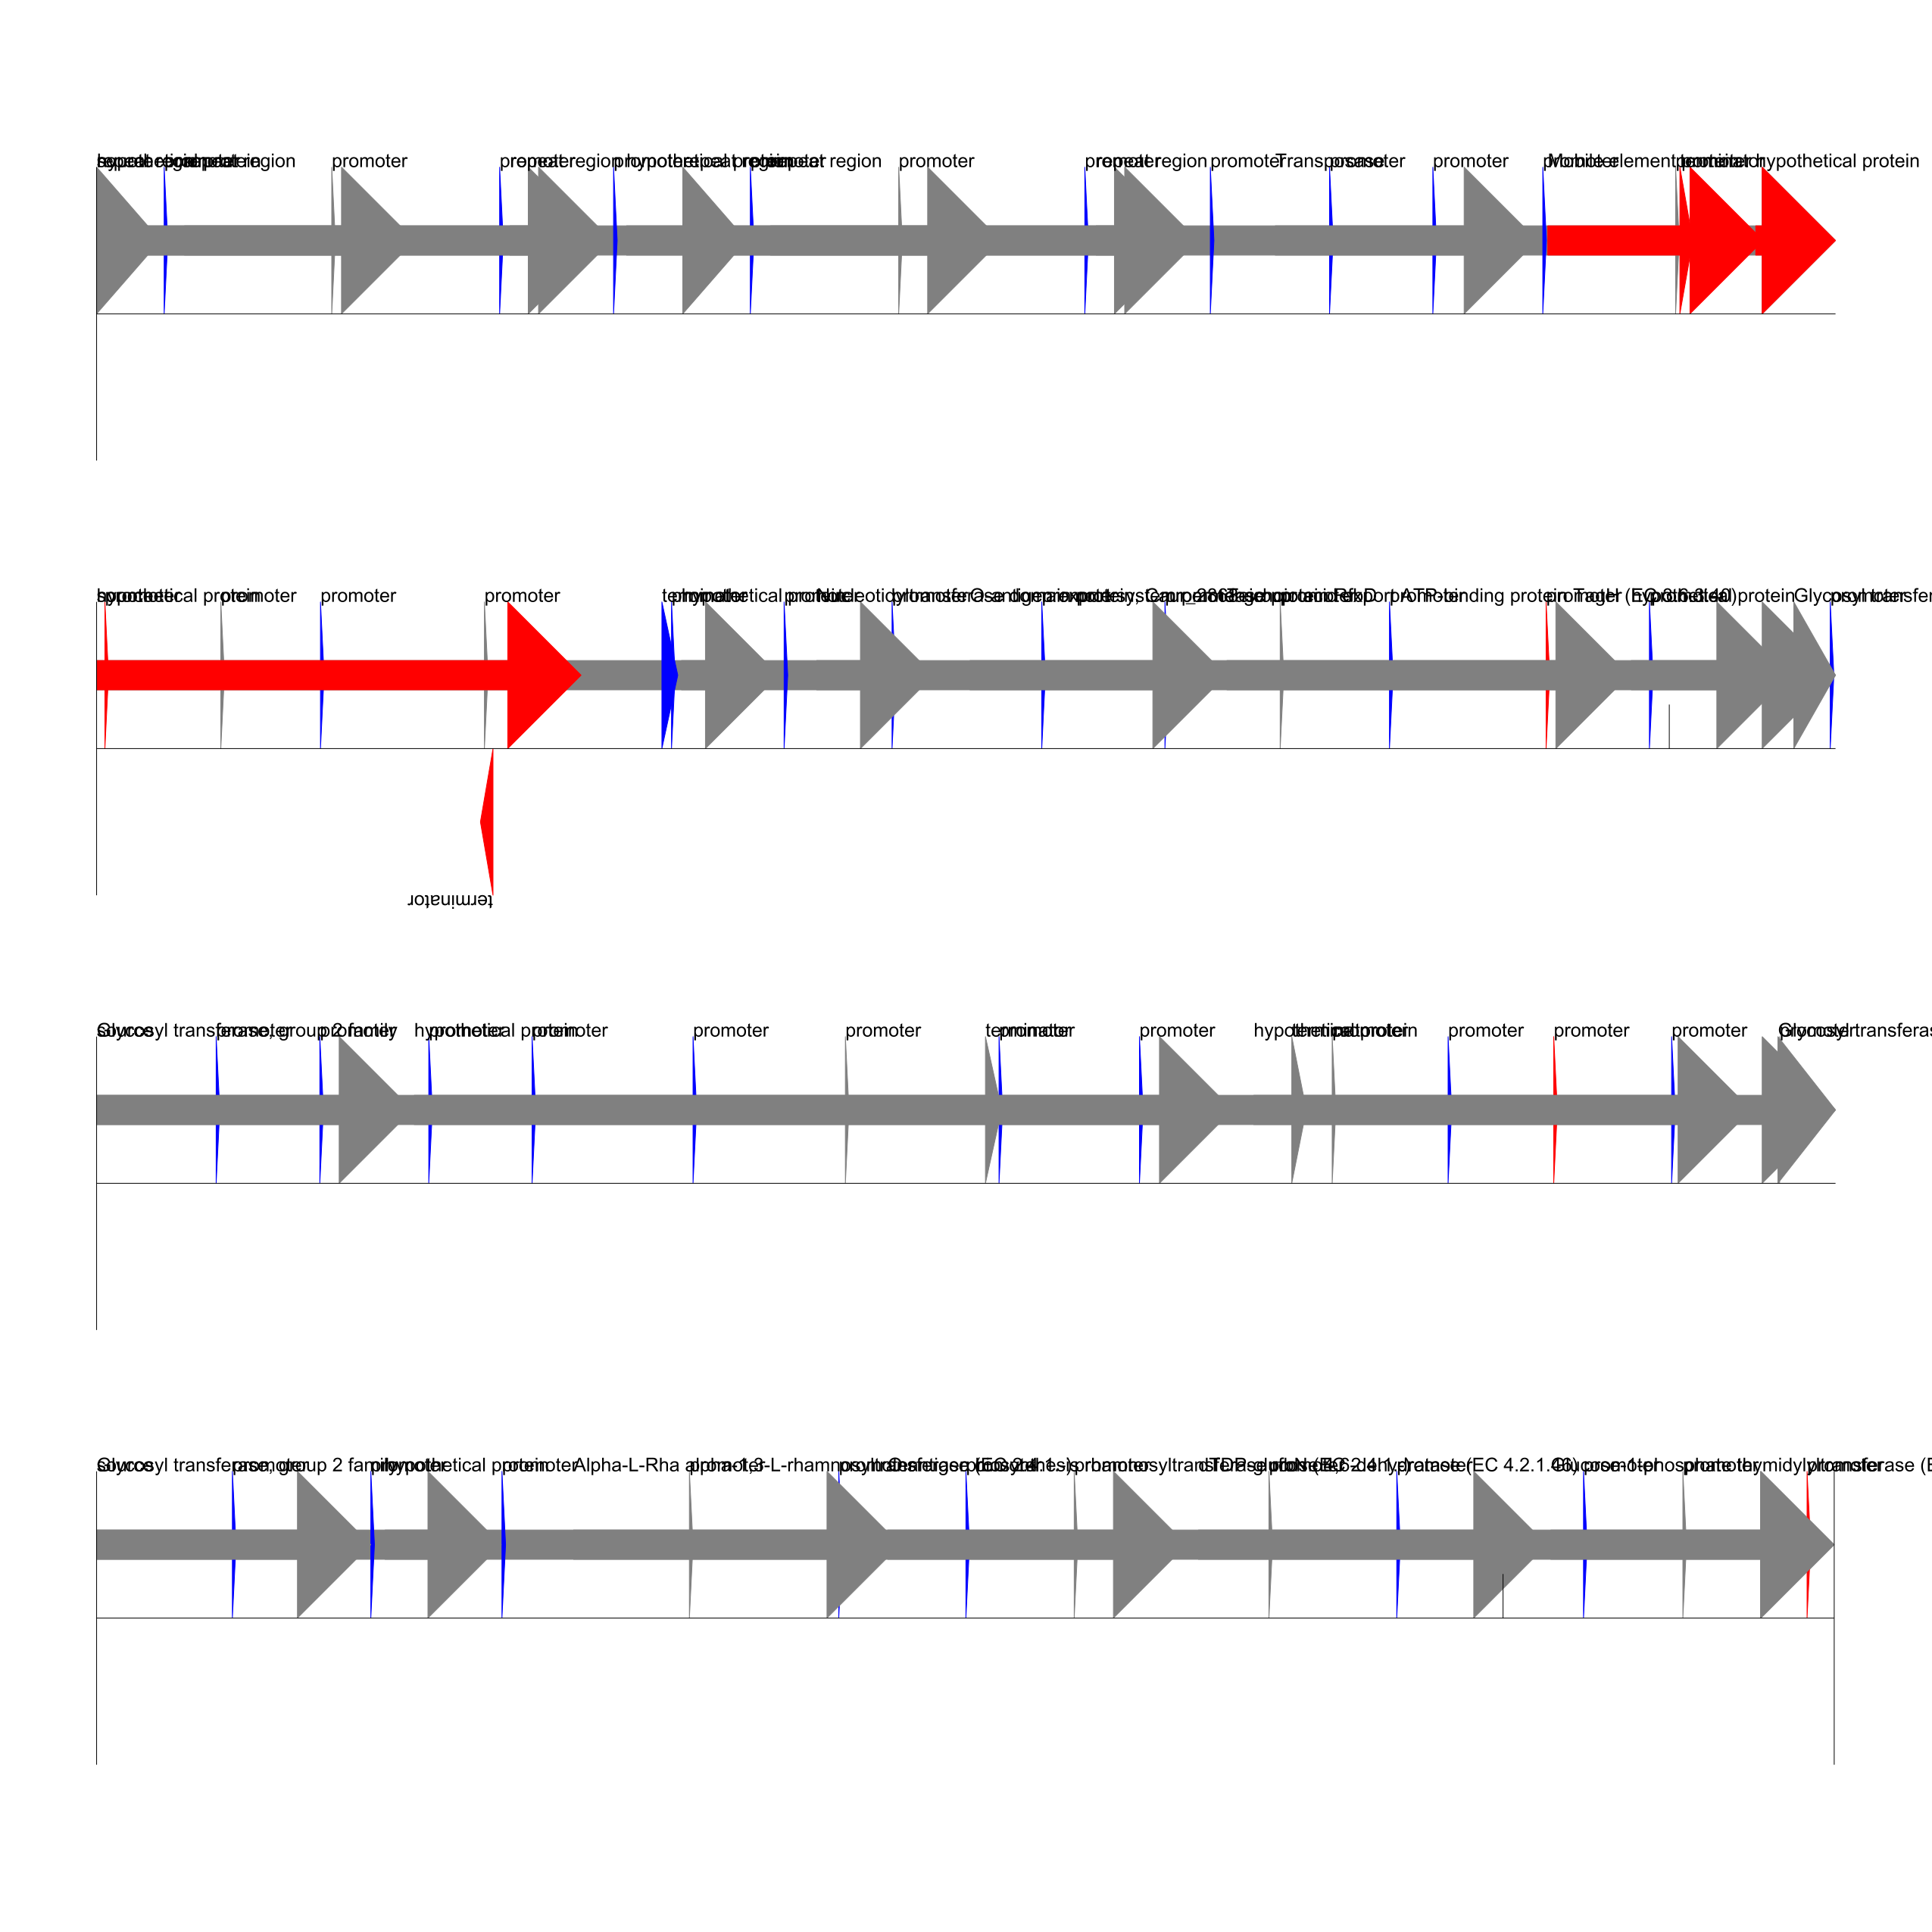

In [24]:
gd_diagram.draw(format="linear", circular=0, fragments=4, pagesize=(90*cm,90*cm), start=0, end=len(record))
gd_diagram.write("Clostridium.png", "PNG")
Image(filename="Clostridium.png") 

/home/pavel/anaconda3/lib/python3.7/site-packages/Bio/GenBank/Scanner.py:1310: BiopythonParserWarning: Truncated LOCUS line found - is this correct?
:'LOCUS       strain                 21000 bp    DNA     linear   UNK \n'
  "correct?\n:%r" % line, BiopythonParserWarning)


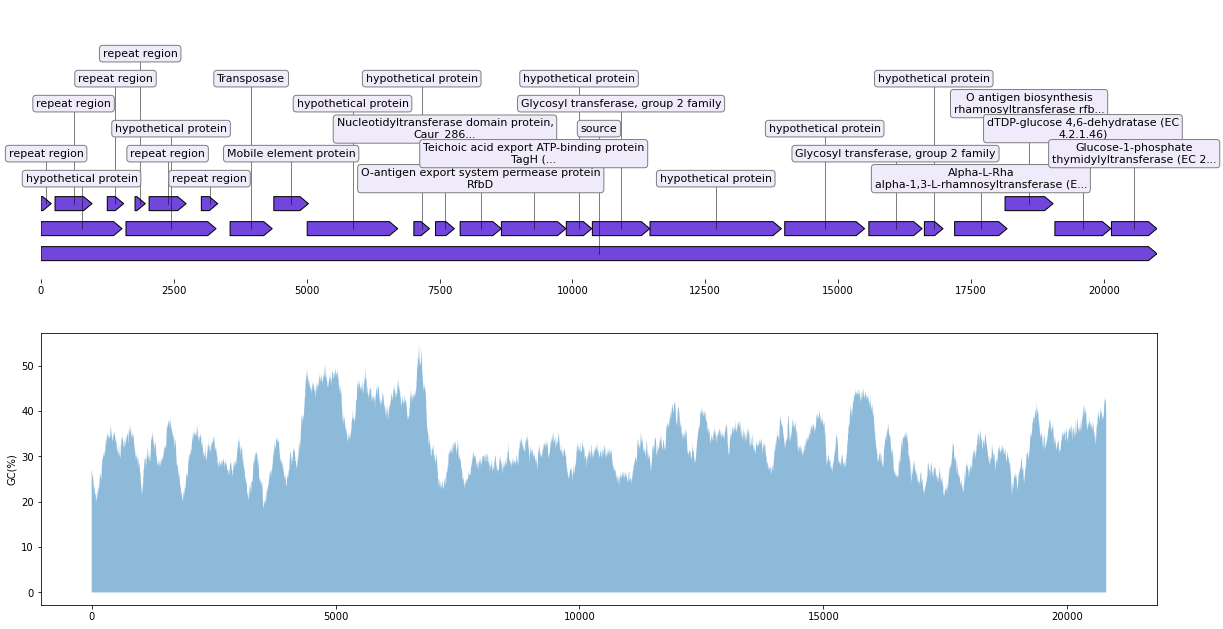

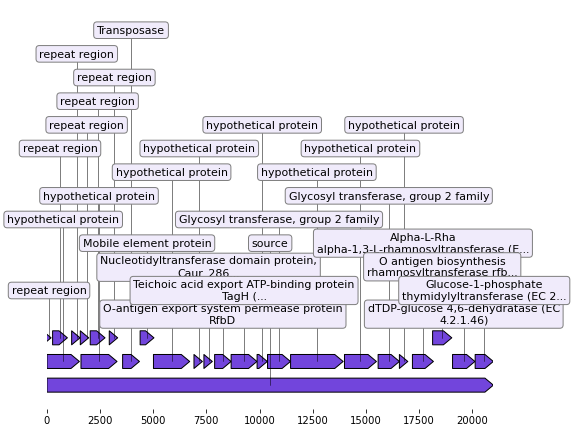

In [151]:
# only for short seqss
import matplotlib.pyplot as plt
from dna_features_viewer import BiopythonTranslator
from Bio import SeqIO
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 11), sharex=False)

# Parse the genbank file, plot annotations
record = SeqIO.read("/home/pavel/Desktop/8_семестр/GEL/6666666.540225.gbk", "genbank")
graphic_record = BiopythonTranslator().translate_record(record)
ax, levels = graphic_record.plot()
graphic_record.plot(ax=ax1, with_ruler=True)

# Plot the local GC content
def plot_local_gc_content(record, window_size, ax):
    gc_content = lambda s: 100.0*len([c for c in s if c in "GC"]) / len(s)
    yy = [gc_content(record.seq[i:i+window_size])
          for i in range(len(record.seq)-window_size)]
    #print(yy)
    xx = np.arange(len(record.seq)-window_size)
    #print(xx)
    ax.fill_between(xx, yy, alpha=0.5)
    ax.set_ylabel("GC(%)")

plot_local_gc_content(record, window_size=200, ax=ax2)

# Resize the figure
fig.savefig("with_plot.png")
#Image(filename='with_plot.png') 